<a href="https://colab.research.google.com/github/Elzfe09/Apriori-Machine-Learning/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apriori Algorithm, Market Basket Analysis and Association Rules

- apriori is an unsupervised machine learning technique used for to understand association rules
- **association rules** data mining technique that finds frequent patterns, relationships, dependencies sets of items within large datasets.

- Property: if an itemset appears frequently in dataset


the algorithm iteratively scans the data to discover frequent k-itemsets combination of k items that commonly occur together and use these to generate and evaluate k+1 itemsets

## main concept
---------------------------
### 1. frequent itemsets:
-- these are grous of items that appear together in a dataset with a fequency aboive a user-defined threshold (support)

### 2. association rules:
-- these are implications like if you buy milk and bread, next item would be butter

### metrics:
- support > how often the itemset appear
- confidence > how often the rule has been found to be true
- lift >how much more likely the consequent is given the antecendent, compared to typical frequency
Lift > 1 → X and Y are positively correlated (buying X increases chance of Y).
Lift = 1 → X and Y are independent (no effect).
Lift < 1 → X and Y are negatively correlated (buying X reduces chance of Y).

3. Apriori Property
This is the core idea: “If an itemset is frequent, then all of its subsets must also be frequent.

### Example

imagine youre analysing customer shopping baskets to see which items are often bought together. for eg:

basket 1: apple, banana
basket 2: apple, bread
basket 3: banana, bread
basket 4: apple, banana

- 1st step: check item popularity (support)
find combination of items that appear often enough in transactions.

apple appear in 3 baskets > support 75%
banana appear in 3 basket > support 75%
bread appear in 2 basket > support 50%
banana and apple in 2 basket > support 50%
banana and bread in 1 basket > support 25%

only large itemsets keep, small ignored

- 2nd step: asociation rules from large itemsets (confidence)
Once you have a large itemset, you want to see if you can break it into useful “if-then” rules. These are called association rules.

goal of rule:
if someone buy apple + banana > also buy bread
if someone buy banana + bread > also buy apple

how to generate rules?
split into 2 parts
- **antecedent (x)**: if part of rule (2 item)
- **consequent (y)** then part of rule (1 item)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from IPython.display import Image

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Groceries_dataset.csv')
df.shape
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
df.itemDescription.value_counts().sort_values(ascending = False)

,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
...,...
rubbing alcohol,5
bags,4
baby cosmetics,3


In [ ]:
# grouping members and items, counting no of items that happened in a day

basket = (df.groupby(['Member_number','itemDescription'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#we are only interested if a item is purchased or not, dont care how many of them in basket
def encode_units(x):
  if x<1:
    return 0
  if x>=1:
    return 1

basket = basket.applymap(encode_units)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#apply apriori algorithm to understand the frequent items that are bought together
new_frequent_itemsets = apriori(basket, min_support = 0.01, use_colnames = True)
new_frequent_itemsets

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)
...,...,...
3011,0.011031,"(soda, whipped/sour cream, yogurt, whole milk)"
3012,0.010518,"(whole milk, yogurt, rolls/buns, bottled water..."
3013,0.013597,"(whole milk, yogurt, sausage, rolls/buns, othe..."
3014,0.010005,"(whole milk, shopping bags, yogurt, rolls/buns..."


In [ ]:
#derive association rules for items

new_rules = association_rules(new_frequent_itemsets,
                              metric = 'confidence',
                              min_threshold = 0.5,
                              support_only = False)

new_rules.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1078,"(sausage, rolls/buns, tropical fruit)",(yogurt),0.020780,0.282966,0.011031,0.530864,1.876073,1.0,0.005151,1.528415,0.476881,0.037686,0.345728,0.284924
901,"(sausage, curd, whole milk)",(yogurt),0.018984,0.282966,0.010005,0.527027,1.862513,1.0,0.004633,1.516016,0.472052,0.034271,0.340376,0.281193
1110,"(sausage, rolls/buns, other vegetables, whole ...",(yogurt),0.026167,0.282966,0.013597,0.519608,1.836293,1.0,0.006192,1.492602,0.467662,0.046007,0.330029,0.283829
410,"(domestic eggs, meat)",(whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,1.0,0.004267,2.512057,0.421328,0.022259,0.601920,0.403355
272,"(coffee, canned beer)",(soda),0.021036,0.313494,0.011288,0.536585,1.711628,1.0,0.004693,1.481407,0.424695,0.034921,0.324966,0.286296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,"(soda, long life bakery product)",(whole milk),0.023602,0.458184,0.011801,0.500000,1.091265,1.0,0.000987,1.083633,0.085654,0.025109,0.077178,0.262878
510,"(rolls/buns, hygiene articles)",(whole milk),0.022576,0.458184,0.011288,0.500000,1.091265,1.0,0.000944,1.083633,0.085564,0.024044,0.077178,0.262318
285,"(pork, canned beer)",(whole milk),0.023602,0.458184,0.011801,0.500000,1.091265,1.0,0.000987,1.083633,0.085654,0.025109,0.077178,0.262878
197,"(pork, bottled water)",(whole milk),0.028220,0.458184,0.014110,0.500000,1.091265,1.0,0.001180,1.083633,0.086061,0.029875,0.077178,0.265398


<Axes: xlabel='consequents', ylabel='antecedents'>

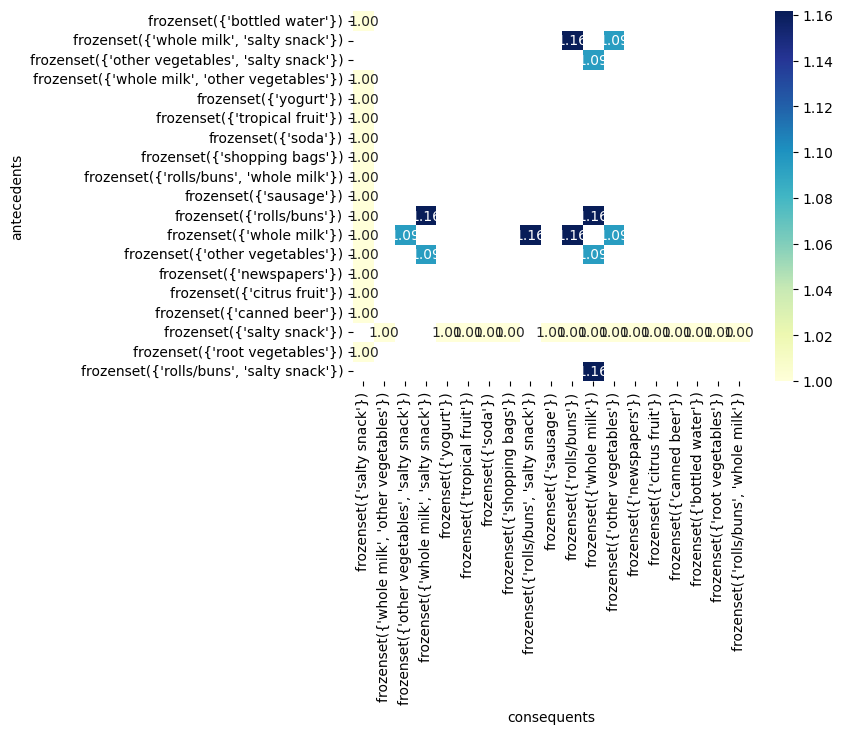

In [ ]:
#we can filter specific item and analyze it closely (salty snack)

cat_df = basket.loc[basket['salty snack'] ==1]
frequent_itemsets = apriori(cat_df, min_support = 0.2, use_colnames = True)
rules = association_rules(frequent_itemsets,
                          metric=  'lift',
                          min_threshold = 1)

#ceate dataframe for viz
heatmap_data = rules.pivot(index = 'antecedents',
                           columns = 'consequents',
                           values= 'lift')
sns.heatmap(heatmap_data, annot = True, fmt = '.2f', cmap = 'YlGnBu')

Text(0, 0.5, 'lift')

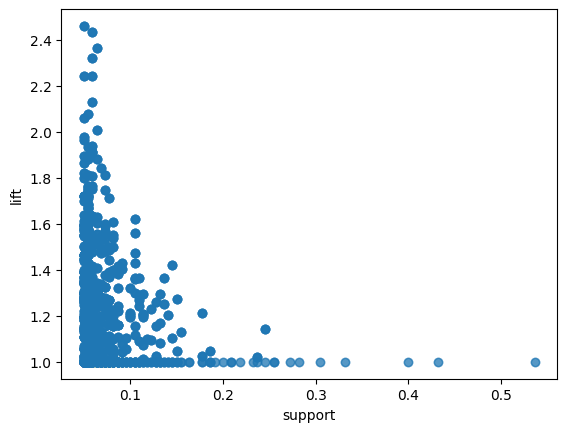

In [ ]:
#support vs lift

cat_df = basket.loc[basket['ice cream']==1]
frequent_itemsets = apriori(cat_df, min_support = 0.05, use_colnames = True)
rules = association_rules(frequent_itemsets,
                          metric = 'lift',
                          min_threshold = 1)
plt.scatter(rules['support'], rules['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift')

### Summary

1. find large itemset (popular most frequent appear combinations)
- scan the transactions and count how often each combination of items appears
- keep only the combination that meet minimum support threshold
- ignored small itemsets
-

2. Generate strong rules  from large itemsets
- take each large itemset with 2 /more items
- split into antecedent and consequent
- for each rule calc confidence
- keep only the rules with high enough confidence

This process helps you find useful patterns in data like:

“If a customer buys Apple and Banana, they’re likely to also buy Bread.”

